In [1]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt

np.random.seed(42)
%matplotlib inline

In [2]:
data = fetch_olivetti_faces()
x = data.data
y = data.target

In [3]:
print(x.shape)
print(y.shape)

(400, 4096)
(400,)


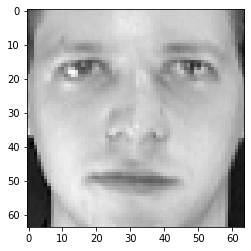

In [4]:
plt.imshow(x[0].reshape(64, 64), cmap='gray')

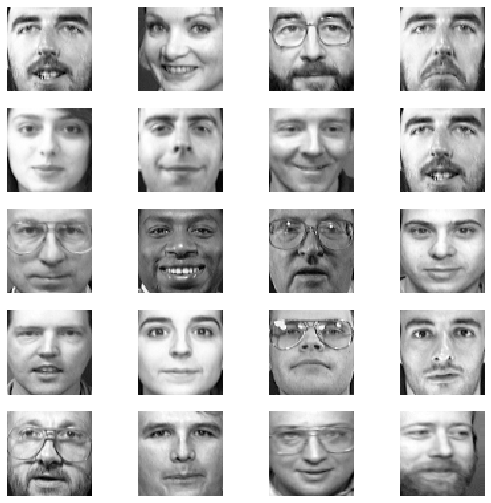

In [5]:
# Looking on a random set of images
fig = plt.figure(figsize=(9, 9))
cols = 4
rows = 5
for ind in range(1, cols*rows+1):
    img = x[np.random.randint(x.shape[0])].reshape(64, 64)
    fig.add_subplot(rows, cols, ind)
    plt.imshow(img, cmap='gray')
    plt.axis("off")
plt.show()

In [6]:
x.shape

(400, 4096)

In [7]:
# Splitting into train and test set and having equal proportions
from sklearn.model_selection import StratifiedShuffleSplit

split_test = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_valid_ind, test_ind in split_test.split(x, y):
    x_train_valid, x_test = x[train_valid_ind], x[test_ind]
    y_train_valid, y_test = y[train_valid_ind], y[test_ind]

split_valid = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_ind, valid_ind in split_valid.split(x_train_valid, y_train_valid):
    x_train, x_valid = x_train_valid[train_ind], x_train_valid[valid_ind]
    y_train, y_valid = y_train_valid[train_ind], y_train_valid[valid_ind]

### PCA Reduction

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
x_train_pca = pca.fit_transform(x_train)
x_valid_pca = pca.transform(x_valid)

In [10]:
def plot_faces(faces, label, n_rows = 4, n_cols = 5): 
    plt.figure(figsize=(8, 5))
    for index, (face, label) in enumerate(zip(faces, label)):
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(face.reshape(64, 64), cmap='gray')
        plt.axis("off")
        plt.title(label)
    plt.show()

### Modifying Images 

In [15]:
from scipy import ndimage

# rotated, flipped and darkened the images
# flipping and darkening has been used from solution as turned out to be easier
x_transformed = []
for face in x_train[:20]:
    transform = ndimage.rotate(face.reshape(64, 64), angle=np.random.choice([90, 180]),
                                        mode='constant')[:,::-1]
    transform[:, 1:-1] *= np.random.choice([1, 0.3])
    x_transformed.append(transform)
    
x_transformed = np.array(x_transformed)

In [19]:
def error(pca, x):
    x_pca = pca.transform(x)
    x_reconstruct = pca.inverse_transform(x_pca)
    return np.square(x_reconstruct - x).mean(axis=-1)

In [21]:
error(pca, x_train[:20]).mean()

0.00017925633

In [23]:
error(pca, x_transformed.reshape(-1, 4096)).mean()

0.0057349848

### The reconstruction error is not large

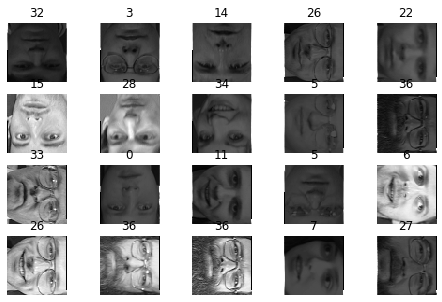

In [24]:
plot_faces(x_transformed, y_train[:20])

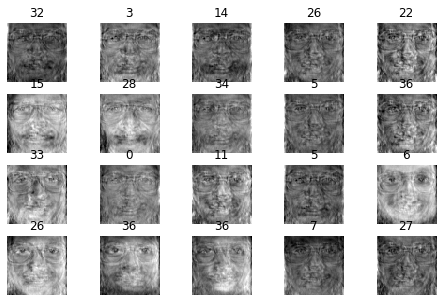

In [26]:
x_transformed_pca = pca.transform(x_transformed.reshape(-1, 4096))
plot_faces(pca.inverse_transform(x_transformed_pca), y_train[:20])

### All reconstructed images look similar as pca one type of alignment of the face but the transformed images have varying alignments